1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


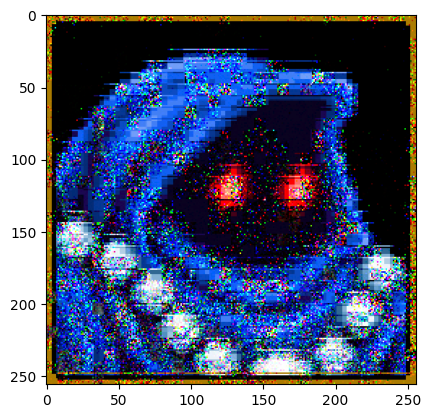

In [1]:

from random import random
from time import sleep
from matplotlib import pyplot
from math import fabs
import numpy as np
from os.path import isfile
def convert(image):
    result =list() #вся картинка
    for id_string in range (0,256,8) :
        for id_column in range (0,256,8):
            temp=list()
            for string in image[id_string:id_string+8]:
                temp1=list()#формирование cтроки пикселей
                for pixel in string[id_column:id_column+8]:
                    temp2=list()#формирование пикселей пиксели
                    for el in pixel[:3]:
                        temp2.append(el)
                    temp1.append(temp2)
                temp.append(temp1)  
            result.append(temp)
    return result

def reconvert(pict):
    picture=list()
    for string in pict[0]:
        picture.append(string)
    i=1
    while 1024 > i:
        j=0
        for string in pict[i]:
            j+=1
            if i%32==0:
                picture.append(string)
            else:
                for el in string:
                    picture[(i//32)*8+j%8].append(el)
        i= i+1
    return  picture
            
        
        
class Neural_network():
    def __init__(self,n:int):
        self.__n=n
        self.__numb_picture=2
        image =list(pyplot.imread("dataset/"+str(self.__numb_picture)+".png"))
        self.blocks_im = convert(image) 
        self.__count=0
        self.big_picture=list()
        for block in self.blocks_im:
            #pyplot.subplot(32,32,count)
            self.__count+=1
            ls=self.start(self.converting(block),0.89)
            
            self.big_picture.append(self.reconverting(ls))
            #pyplot.imshow(bl)
            print( self.__count)
            #self.start(self.converting(block))
        itog=reconvert(self.big_picture)
        pyplot.imshow(itog)
        


    def converting(self,block):
        ls=list()
        for string in block:
            for pix in string:
                for cl in pix:
                    ls.append(cl*2-1)
        return ls

    def reconverting(self,vector:list):
        matrix=list()
        px=list()
        string=list()
        size= len(vector)
        for index in range(size):
            px.append((vector[index]+1)/2)
            if (index+1)%3==0:
                string.append(px)
                px=[]
            if (index+1)%(3*8)==0:
                matrix.append(string)
                string=[]
        return matrix


    def summary(self,vector,matrix):
        new_vector=list()
        if len(matrix[0])!=len(vector):
            return None
        for string in matrix:
            temp=0
            for index in range(len(vector)):
                temp+=vector[index]*string[index]
            new_vector.append(temp)
        return new_vector

    def check(self,vector):
        new_vector=list()
        for el in vector:
            if el >1:
                new_vector.append(1.)
            elif el <-1:
                new_vector.append(-1.)
            else:
                new_vector.append(el)
        return new_vector
                

    def start(self,x:list,miss_your):
        matrix=list()
        path1="./matrix/matrix"+str(4)+"_"+str(self.__count)
        path2="./matrix/t_matrix"+str(4)+"_"+str(self.__count)
        trans_matrix = list()
        if(not isfile(path1+".npy")):    
            for number in range(self.__n):
                temp=list()
                for number_px in range(64*3):
                    temp.append(random()*2-1)
                matrix.append(temp)
        else:
            matrix=np.load(path1+".npy").tolist()
            trans_matrix=np.load(path2+".npy").tolist()
        miss=miss_your+1
        miss_v=[]
        y=list()
        alfa =0.00005
        flag=False
        x1=list()
        while miss_your < fabs(miss):
            if trans_matrix!=[]and flag:
                trans_matrix= self.diff_matrix(trans_matrix,self.multiplying(alfa,miss_v,x1))
                matrix=self.diff_matrix(matrix,self.mult_m(matrix,self.multiplying(alfa,x,miss_v)))
            elif flag:
                for el in matrix[0]:
                    trans_matrix.append([el])
                for string in matrix[1:]: 
                    for index in range(len(string)):
                        trans_matrix[index].append(string[index])
                
            x1=self.summary(x,matrix)           
            y =self.summary(x1,trans_matrix)
            y=self.check(y)
            miss_v=self.difference(x,y)
            miss= sum(miss_v)
            flag=True

        self.save(path1,matrix) 
        self.save(path2,trans_matrix)
          
        return y 

    def save(self,path,matrix):
        np.save(path,matrix)#function to save weights

    def diff_matrix(self,matrix1,matrix2):
        matr=list()
        for index_str in range(len(matrix1)):
            temp=list()
            for index_el in range(len(matrix1[index_str])):
                temp.append(matrix1[index_str][index_el]+matrix2[index_str][index_el])
            matr.append(temp) 
        return matr        


    def difference(self,vector1,vector2):
        new_vector=list()
        for index in range(len(vector1)):
            new_vector.append(vector1[index]-vector2[index])
        return new_vector
    

    def multiplying(self,alfa,v1,v2):
        matrix= list()
        for el1 in v1:
            string=list()
            for el2 in v2:
                string.append(alfa*el1*el2)
            matrix.append(string)
        return matrix


    def mult_m(self,matrix1,matrix2):
        matr=list()
        for el in range(len(matrix1)):
            string= list()
            for el1 in range(len(matrix2)):
                summury=0
                for el2 in range(len(matrix2[el1])):
                    summury+=matrix1[el][el2]*matrix2[el2][el1]
                string.append(summury)
            matr.append(string)
        return matr
 
    

def main():
    nn = Neural_network(3)

if __name__=='__main__':
    main()

